<div style="background-color: green; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
INDIAN CLIMATE DATASET (2024-25)
</div>

<div style="background-color: blue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
IMPORT LIBRARIES,ALGORITHMS AND METRICS
</div>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
from tabulate import tabulate

Unsupervised learning is a type of machine learning where the model learns patterns from data without any labeled output (no predefined answers).

<div style="background-color: blue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
LOAD DATASET
</div>


In [7]:
df=pd.read_csv(r"C:\Users\USER\Downloads\Indian_Climate_Dataset_2024_2025.csv")
df

,Date,City,State,Temperature_Max (°C),Temperature_Min (°C),Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,AQI_Category,Pressure (hPa),Cloud_Cover (%)
0,2024-01-01,Mumbai,Maharashtra,32.5,18.0,25.2,77.6,0.0,3.3,259,Poor,1020.3,62.1
1,2024-01-01,Delhi,Delhi,25.4,10.7,18.1,84.1,0.0,9.0,130,Moderate,1008.4,46.0
2,2024-01-01,Bengaluru,Karnataka,37.2,30.8,34.0,49.0,3.7,6.6,54,Satisfactory,1008.0,61.3
3,2024-01-01,Chennai,Tamil Nadu,37.2,30.4,33.8,34.2,9.5,9.0,176,Moderate,993.4,70.0
4,2024-01-01,Kolkata,West Bengal,27.4,17.5,22.5,32.2,9.1,9.2,97,Satisfactory,1008.2,56.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7305,2025-12-31,Hyderabad,Telangana,41.8,32.8,37.3,65.2,4.2,19.4,95,Satisfactory,1007.0,48.3
7306,2025-12-31,Ahmedabad,Gujarat,37.7,23.5,30.6,76.7,12.7,9.1,173,Moderate,1000.5,49.6
7307,2025-12-31,Jaipur,Rajasthan,44.2,37.6,40.9,74.8,1.2,20.5,329,Very Poor,1006.4,80.0
7308,2025-12-31,Lucknow,Uttar Pradesh,43.7,35.3,39.5,50.3,0.0,7.3,80,Satisfactory,1011.6,45.9


<div style="background-color: blue; color:black; font-weight: bold; padding: 15px; border-radius: 15px; text-align: center; font-size: 35px;">
COLUMN,SHAPE,INFO,UNIQUE
</div>

In [8]:
df.columns

Index(['Date', 'City', 'State', 'Temperature_Max (°C)', 'Temperature_Min (°C)',
       'Temperature_Avg (°C)', 'Humidity (%)', 'Rainfall (mm)',
       'Wind_Speed (km/h)', 'AQI', 'AQI_Category', 'Pressure (hPa)',
       'Cloud_Cover (%)'],
      dtype='object')

| Column Name              | Description                                                  |
| ------------------------ | ------------------------------------------------------------ |
| **Date**                 | Date on which the weather and air quality data was recorded  |
| **City**                 | Name of the city where data was collected                    |
| **State**                | State to which the city belongs                              |
| **Temperature_Max (°C)** | Highest temperature recorded during the day                  |
| **Temperature_Min (°C)** | Lowest temperature recorded during the day                   |
| **Temperature_Avg (°C)** | Average temperature of the day                               |
| **Humidity (%)**         | Average relative humidity level in the air                   |
| **Rainfall (mm)**        | Total rainfall received during the day                       |
| **Wind_Speed (km/h)**    | Average wind speed during the day                            |
| **AQI**                  | Air Quality Index value indicating pollution level           |
| **AQI_Category**         | Category of air quality (Good, Moderate, Poor, Severe, etc.) |
| **Pressure (hPa)**       | Atmospheric pressure measured in hectopascals                |
| **Cloud_Cover (%)**      | Percentage of the sky covered by clouds                      |

In [9]:
df.shape

(7310, 13)

In [10]:
df.isnull().sum()

Date                    0
City                    0
State                   0
Temperature_Max (°C)    0
Temperature_Min (°C)    0
Temperature_Avg (°C)    0
Humidity (%)            0
Rainfall (mm)           0
Wind_Speed (km/h)       0
AQI                     0
AQI_Category            0
Pressure (hPa)          0
Cloud_Cover (%)         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310 entries, 0 to 7309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  7310 non-null   object 
 1   City                  7310 non-null   object 
 2   State                 7310 non-null   object 
 3   Temperature_Max (°C)  7310 non-null   float64
 4   Temperature_Min (°C)  7310 non-null   float64
 5   Temperature_Avg (°C)  7310 non-null   float64
 6   Humidity (%)          7310 non-null   float64
 7   Rainfall (mm)         7310 non-null   float64
 8   Wind_Speed (km/h)     7310 non-null   float64
 9   AQI                   7310 non-null   int64  
 10  AQI_Category          7310 non-null   object 
 11  Pressure (hPa)        7310 non-null   float64
 12  Cloud_Cover (%)       7310 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 742.6+ KB


In [12]:
for i in df:
    print([i])
    print(df[i].unique())
    print(df[i].nunique())

['Date']
['2024-01-01' '2024-01-02' '2024-01-03' '2024-01-04' '2024-01-05'
 '2024-01-06' '2024-01-07' '2024-01-08' '2024-01-09' '2024-01-10'
 '2024-01-11' '2024-01-12' '2024-01-13' '2024-01-14' '2024-01-15'
 '2024-01-16' '2024-01-17' '2024-01-18' '2024-01-19' '2024-01-20'
 '2024-01-21' '2024-01-22' '2024-01-23' '2024-01-24' '2024-01-25'
 '2024-01-26' '2024-01-27' '2024-01-28' '2024-01-29' '2024-01-30'
 '2024-01-31' '2024-02-01' '2024-02-02' '2024-02-03' '2024-02-04'
 '2024-02-05' '2024-02-06' '2024-02-07' '2024-02-08' '2024-02-09'
 '2024-02-10' '2024-02-11' '2024-02-12' '2024-02-13' '2024-02-14'
 '2024-02-15' '2024-02-16' '2024-02-17' '2024-02-18' '2024-02-19'
 '2024-02-20' '2024-02-21' '2024-02-22' '2024-02-23' '2024-02-24'
 '2024-02-25' '2024-02-26' '2024-02-27' '2024-02-28' '2024-02-29'
 '2024-03-01' '2024-03-02' '2024-03-03' '2024-03-04' '2024-03-05'
 '2024-03-06' '2024-03-07' '2024-03-08' '2024-03-09' '2024-03-10'
 '2024-03-11' '2024-03-12' '2024-03-13' '2024-03-14' '2024-03-15'
 

In [13]:
df.drop(["City","State","Date","AQI_Category","Temperature_Max (°C)","Temperature_Min (°C)",'Cloud_Cover (%)'],axis=1,inplace=True)

In [14]:
df

,Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,Pressure (hPa)
0,25.2,77.6,0.0,3.3,259,1020.3
1,18.1,84.1,0.0,9.0,130,1008.4
2,34.0,49.0,3.7,6.6,54,1008.0
3,33.8,34.2,9.5,9.0,176,993.4
4,22.5,32.2,9.1,9.2,97,1008.2
...,...,...,...,...,...,...
7305,37.3,65.2,4.2,19.4,95,1007.0
7306,30.6,76.7,12.7,9.1,173,1000.5
7307,40.9,74.8,1.2,20.5,329,1006.4
7308,39.5,50.3,0.0,7.3,80,1011.6


In [15]:
df.columns

Index(['Temperature_Avg (°C)', 'Humidity (%)', 'Rainfall (mm)',
       'Wind_Speed (km/h)', 'AQI', 'Pressure (hPa)'],
      dtype='object')

<div style="background-color: blue; color:black; font-weight: bold; padding: 10px; border-radius: 15px; text-align: center; font-size: 35px;">
SCALING
</div>

bcz mosdt algorithms depends on distance or similarity 
large value features dominate the result

In [16]:
scaler=RobustScaler()
scaled=scaler.fit_transform(df)

In [17]:
df=pd.DataFrame(scaled,columns=df.columns)
df

,Temperature_Avg (°C),Humidity (%),Rainfall (mm),Wind_Speed (km/h),AQI,Pressure (hPa)
0,-0.48,0.461300,0.000000,-0.910714,0.422078,0.742857
1,-1.19,0.662539,0.000000,-0.401786,-0.415584,0.062857
2,0.40,-0.424149,0.587302,-0.616071,-0.909091,0.040000
3,0.38,-0.882353,1.507937,-0.401786,-0.116883,-0.794286
4,-0.75,-0.944272,1.444444,-0.383929,-0.629870,0.051429
...,...,...,...,...,...,...
7305,0.73,0.077399,0.666667,0.526786,-0.642857,-0.017143
7306,0.06,0.433437,2.015873,-0.392857,-0.136364,-0.388571
7307,1.09,0.374613,0.190476,0.625000,0.876623,-0.051429
7308,0.95,-0.383901,0.000000,-0.553571,-0.740260,0.245714


<div style="background-color: blue; color:black; font-weight: bold; padding: 10px; border-radius: 15px; text-align: center; font-size: 35px;">
PCA
</div>

In [18]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(scaled)

<div style="background-color: blue; color:black; font-weight: bold; padding: 10px; border-radius: 15px; text-align: center; font-size: 35px;">
KMEANS
</div>

unsupervised ml algorithm used group data into k similar clusters based on distance.

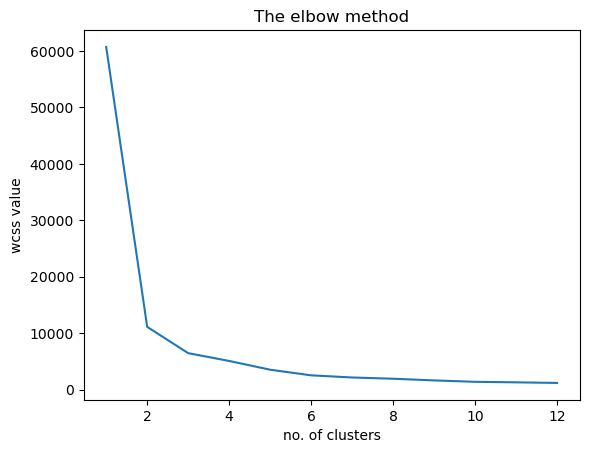

In [19]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title("The elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("wcss value")
plt.show()

### The plot shows the Elbow Method for K-means clustering, where WCSS decreases as the number of clusters increases. A clear elbow appears around 4 clusters, indicating that this is the optimal number of clusters for the data.

In [20]:
type(reduced)

numpy.ndarray

In [21]:
kmeans=KMeans(n_clusters=2,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(reduced)

In [22]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], shape=(7310,), dtype=int32)

In [23]:
score1=silhouette_score(reduced,y_kmeans)
print("Silhouette Score:",score1)

Silhouette Score: 0.8299578604478294


<div style="background-color: blue; color:black; font-weight: bold; padding: 10px; border-radius: 15px; text-align: center; font-size: 35px;">
DBSCAN
</div>

In [24]:
epsilon = 0.5
min_samples = 18
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(reduced)

In [25]:
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(7310,))

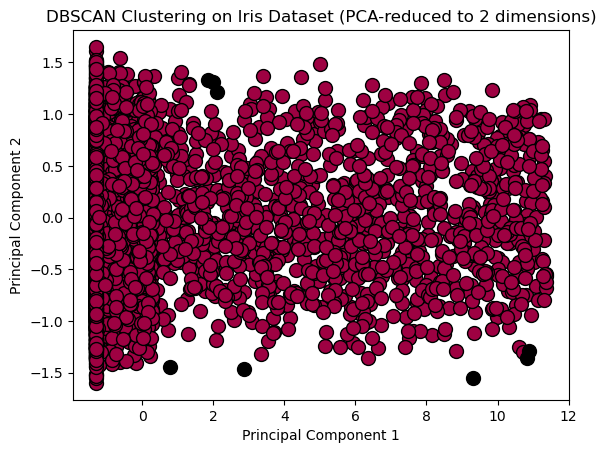

In [26]:
unique_labels=set(labels)
colors=[plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)
    xy=reduced[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### The plot shows DBSCAN clustering on the PCA-reduced Iris dataset, where most points form one dense cluster and a few are treated as noise, indicating weak cluster separation with the chosen parameters.

In [27]:
unique_labels

{np.int64(-1), np.int64(0)}

In [28]:
score2=silhouette_score(reduced,labels)
print("Silhouette Score:",score2)

Silhouette Score: 0.5741180162652748


<div style="background-color: blue; color:black; font-weight: bold; padding: 10px; border-radius: 15px; text-align: center; font-size: 35px;">
HIERARCHICAL CLUSTERING
</div>

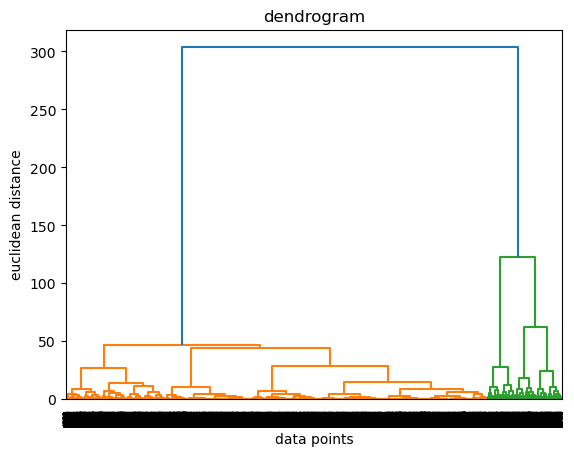

In [29]:
dendrogram=sch.dendrogram(sch.linkage(reduced,method="ward"))
plt.title("dendrogram")
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

### The dendrogram shows hierarchical clustering using Ward’s method, where large vertical gaps indicate well-separated clusters and suggest a small number of natural groups in the data.

In [30]:
ahc=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="ward")
y_ahc=ahc.fit_predict(reduced)
y_ahc

array([1, 1, 1, ..., 1, 1, 1], shape=(7310,))

In [31]:
sil_ahc=silhouette_score(reduced,y_ahc)
sil_ahc

0.7909207957751696

<div style="background-color: blue; color:black; font-weight: bold; padding: 10px; border-radius: 15px; text-align: center; font-size: 35px;">
FUZZY
</div>

In [32]:
data=reduced.T

In [33]:
jm_values = []
cluster_range = range(2, 11)

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=data,
        c=c,
        m=2,
        error=0.005,
        maxiter=1000,
        init=None
    )
    jm_values.append(jm[-1])  


### The plot shows the Elbow Method for Fuzzy C-Means, with a clear elbow around 4 clusters, suggesting it as the optimal number of clusters.

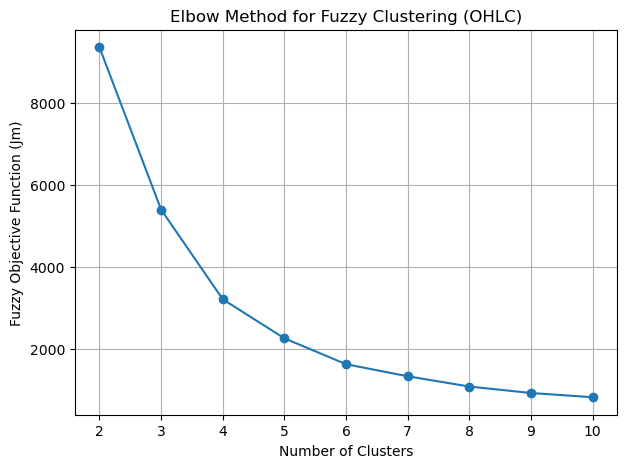

In [34]:
plt.figure(figsize=(7,5))
plt.plot(cluster_range, jm_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Fuzzy Objective Function (Jm)")
plt.title("Elbow Method for Fuzzy Clustering (OHLC)")
plt.grid(True)
plt.show()

In [35]:
n_clusters = 3

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=data,
    c=n_clusters,
    m=2,
    error=0.005,
    maxiter=1000
)

In [36]:
hard_clusters = np.argmax(u, axis=0)

In [37]:
score4=silhouette_score(reduced,hard_clusters)
print(score4)

0.761072842253157


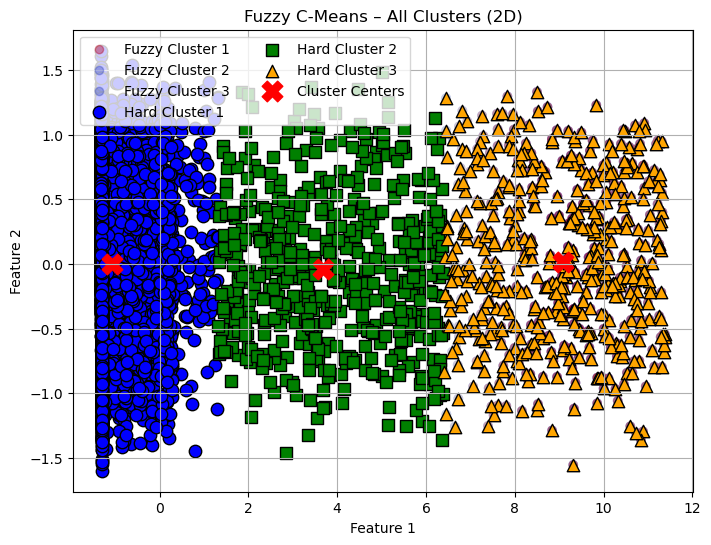

In [38]:
fig, ax = plt.subplots(figsize=(8, 6))


for i in range(n_clusters):
    ax.scatter(
        data[0],        
        data[1],        
        c=u[i],
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Cluster {i+1}'
    )

hard_clusters = np.argmax(u, axis=0)

markers = ['o', 's', '^', 'D']
colors = ['blue', 'green', 'orange', 'purple']

for i in range(n_clusters):
    cluster_points = data[:, hard_clusters == i]
    ax.scatter(
        cluster_points[0],
        cluster_points[1],  
        c=colors[i],
        marker=markers[i],
        edgecolor='k',
        s=80,
        label=f'Hard Cluster {i+1}'
    )
ax.scatter(
    cntr[:, 0],
    cntr[:, 1],  
    c='red',
    marker='X',
    s=220,
    label='Cluster Centers'
)

ax.set_title('Fuzzy C-Means – All Clusters (2D)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left', ncol=2)
ax.grid(True)

plt.show()


### The plot shows Fuzzy C-Means clustering, where data points belong to clusters with varying membership degrees. Two main clusters are visible, their centers marked in red, and the overlap between clusters highlights the fuzzy nature of the clustering.

In [39]:
table = [
    ['Clustering Method', 'Silhouette Score'],
    ['KMeans', score1],
    ['DBSCAN', score2],
    ['Agglomerative', sil_ahc],
    ['Fuzzy C-Means', score4],
   
]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════════════╕
│ Clustering Method   │   Silhouette Score │
╞═════════════════════╪════════════════════╡
│ KMeans              │           0.829958 │
├─────────────────────┼────────────────────┤
│ DBSCAN              │           0.574118 │
├─────────────────────┼────────────────────┤
│ Agglomerative       │           0.790921 │
├─────────────────────┼────────────────────┤
│ Fuzzy C-Means       │           0.761073 │
╘═════════════════════╧════════════════════╛


### The Elbow Method helps select an optimal number of clusters by showing where improvement starts to level off. K-means clustering, visualized using PCA, forms clearly separated groups, indicating effective partitioning. DBSCAN identifies dense regions but, with the chosen parameters, mostly detects a single dominant cluster and some noise. Hierarchical clustering (dendrogram) reveals natural groupings and confirms cluster separation at certain distance thresholds.Fuzzy C-Means highlights overlapping clusters by allowing partial membership, providing a more flexible view of data structure. Together, these methods give a comprehensive understanding of the dataset’s clustering behavior.

In [40]:
df['Kmeans_Cluster'] = y_kmeans 

numeric_cols = ['Temperature_Avg (°C)', 'Humidity (%)', 'Rainfall (mm)',
                'Wind_Speed (km/h)', 'AQI', 'Pressure (hPa)']

cluster_summary = df.groupby('Kmeans_Cluster')[numeric_cols].mean().round(2)

cluster_summary['Count'] = df['Kmeans_Cluster'].value_counts()

categorical_cols = ['Region', 'Season'] 
for col in categorical_cols:
    if col in df.columns:
        cluster_summary[f'Most_Common_{col}'] = df.groupby('Kmeans_Cluster')[col] \
                                                        .agg(lambda x: x.value_counts().idxmax())

print("Indian Climate Dataset Cluster Summary (KMeans c=2):")
print(cluster_summary)


Indian Climate Dataset Cluster Summary (KMeans c=2):
                Temperature_Avg (°C)  Humidity (%)  Rainfall (mm)  \
Kmeans_Cluster                                                      
0                               0.00         -0.00           0.38   
1                              -0.05         -0.01           8.61   

                Wind_Speed (km/h)   AQI  Pressure (hPa)  Count  
Kmeans_Cluster                                                  
0                            0.00 -0.00            0.00   6486  
1                           -0.02 -0.01            0.01    824  


| Column Name          | Description                                             | Cluster Interpretation                                        |
| -------------------- | ------------------------------------------------------- | ------------------------------------------------------------- |
| Temperature_Avg (°C) | Average daily temperature in degrees Celsius.           | 0: ~0.00 (neutral), 1: ~-0.05 (slightly lower than average)   |
| Humidity (%)         | Average daily relative humidity as a percentage.        | 0: ~-0.00 (neutral), 1: ~-0.01 (slightly lower than average)  |
| Rainfall (mm)        | Total daily rainfall in millimeters.                    | 0: ~0.38 (low), 1: ~8.61 (high)                               |
| Wind_Speed (km/h)    | Average daily wind speed in kilometers per hour.        | 0: ~0.00 (neutral), 1: ~0.00 (neutral)                        |
| AQI                  | Air Quality Index, representing the level of pollution. | 0: ~-0.00 (neutral), 1: ~0.00 (neutral)                       |
| Pressure (hPa)       | Atmospheric pressure measured in hectopascals.          | 0: ~0.00 (neutral), 1: ~0.00 (neutral)                        |
| Count                | Number of data points per cluster                       | 0: 6486, 1: (not specified, implied smaller)                  |
| Kmeans_Cluster       | KMeans cluster label (0 or 1)                           | 0: likely low-rainfall/average climate, 1: high-rainfall days |


dataset is divided into 2 groups (clusters) mainly based on rainfall.

🌤️ Cluster 0 (Most data – Normal days)

Count: 6486 records

Temperature: Normal

Humidity: Normal

Rainfall: Low (~0.38 mm)

Wind Speed: Normal

AQI: Normal

Pressure: Normal

👉 This cluster represents regular / dry weather days with little or no rain.

🌧️ Cluster 1 (Fewer data – Rainy days)

Count: 824 records

Temperature: Slightly lower than average

Humidity: Slightly lower

Rainfall: High (~8.61 mm)

Wind Speed: Normal

AQI: Normal

Pressure: Normal
